In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Data loader

In [ ]:
bs = 100 #batch size


mu=-6
std=4

Data = np.random.normal(mu, std, (100*bs,1))
tensor_x= torch.Tensor(Data)

train_dataset =  torch.utils.data.TensorDataset( tensor_x)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)

Network definition

In [ ]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        
        # MISSING CODE
        # Add a few fully connected layers to the network
        # Set the nbr. of features of the first and the last FC layer according to the input parameters
       
    # forward method
    def forward(self, x): 
        
        # MISSING CODE
        # Run the data through the network layers
        # Apply activation function on the FC layers' output
        # Select the activation function of the last FC layer carefully

       
        return  x
        

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
        
        # MISSING CODE
        # Add a few fully connected layers to the network
        # Set the nbr. of features of the first and the last FC layer according to the input parameters
        
    # forward method
    def forward(self, x):
        
        # MISSING CODE
        # Run the data through the network layers
        # Apply activation function on the FC layers' output
        # Select the activation function of the last FC layer carefully
       
        return x

Training function definition

In [ ]:
def D_train(x):
    ###
    # input parameter x: a batch of input image data
    ###
    #=======================Train the discriminator=======================#
    
  # train discriminator on real

    # MISSING CODE    
   
    # MISSING CODE
    # run the discriminator on real data
    # calculate loss for real data
  
  # train discriminator on fake

    # MISSING CODE
    
   # MISSING CODE
    # run the discriminator on fake data
    # calculate loss for fake data


  # gradient backprop & optimize ONLY D's parameters
    
    # MISSING CODE
    # calculate the overall loss
    # propagate back the loss
    # update the weights
  

        
    return  0
    
def G_train(x):
    #=======================Train the generator=======================#
   
    # MISSING CODE
   
    # MISSING CODE
    # run the discriminator on fake data
    # calculate loss for fake data



  # gradient backprop & optimize ONLY G's parameters
    # MISSING CODE
    # calculate the loss
    # propagate back the loss
    # update the weights
        
    return 0

Set up networks and training parameters

In [ ]:
# build network
z_dim = 100
mnist_dim = 1

G = Generator(g_input_dim = z_dim, g_output_dim = mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)


# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)

# epoch nbr
n_epoch = 20

Train the network

In [ ]:
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, x in enumerate(train_loader):
        x=x[0]
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
            
  

[1/20]: loss_d: 1.316, loss_g: 0.984
[2/20]: loss_d: 1.281, loss_g: 0.902
[3/20]: loss_d: 1.268, loss_g: 0.786
[4/20]: loss_d: 1.241, loss_g: 0.946
[5/20]: loss_d: 1.255, loss_g: 0.806
[6/20]: loss_d: 1.271, loss_g: 0.827
[7/20]: loss_d: 1.406, loss_g: 0.742
[8/20]: loss_d: 1.393, loss_g: 0.714
[9/20]: loss_d: 1.392, loss_g: 0.722
[10/20]: loss_d: 1.389, loss_g: 0.703
[11/20]: loss_d: 1.389, loss_g: 0.705
[12/20]: loss_d: 1.389, loss_g: 0.697
[13/20]: loss_d: 1.388, loss_g: 0.693
[14/20]: loss_d: 1.389, loss_g: 0.699
[15/20]: loss_d: 1.390, loss_g: 0.691
[16/20]: loss_d: 1.387, loss_g: 0.698
[17/20]: loss_d: 1.388, loss_g: 0.708
[18/20]: loss_d: 1.386, loss_g: 0.692
[19/20]: loss_d: 1.388, loss_g: 0.708
[20/20]: loss_d: 1.387, loss_g: 0.685


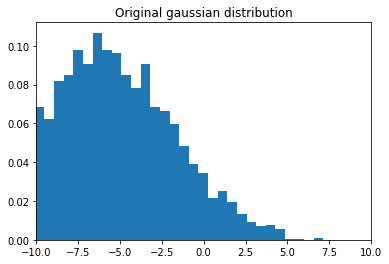

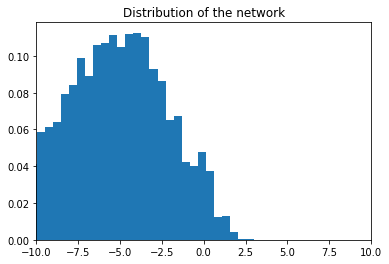

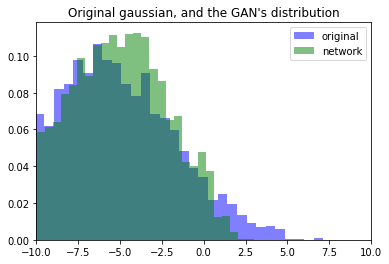

In [ ]:
with torch.no_grad():
    test_z = Variable(torch.randn(30*bs, z_dim).to(device))
    generated = G(test_z)
    generated=generated.cpu().detach().numpy()


f,ax=plt.subplots(1)
bins=50   
Data = np.random.normal(mu, std, 30*bs)
plt.hist(Data, bins, density=True)
plt.xlim(-10, 10)
plt.title('Original gaussian distribution')
plt.show()

plt.hist(generated, bins, density=True)
plt.xlim(-10, 10)
plt.title('Distribution of the network')
plt.show()

plt.hist(Data, bins, alpha=0.5, label='original', color='b', density=True)
plt.hist(generated, bins, alpha=0.5, label='network', color='g', density=True)
plt.legend(loc='upper right')
plt.xlim(-10, 10)
plt.title("Original gaussian, and the GAN's distribution")
plt.show()         